1. [Introduction](#1)
      * [Explanation for features](#2)
      * [Which Models Used](#3)
2. [Import Data and Python Packages](#4)
3. [Distribution of Target](#5)
4. [Data Analysis](#6)
    * [Preparing numerical and categorical columns](#7)
    * [Which numerical columns has 0 variance](#8)
    * [Which categorical columns has 0 variance](#9)
    * [Visualization for Numerical Features](#10)
    * [Buff Method](#11)
5. [Train Test split](#12)
    * [After train test split, checking for distibution of target](#13)
6. [Feature Engineering](#14)
    * [Outlier Detection](#15)
        * [Visualization before outlier detection](#16)
        * [Finding and fixing outliers](#17)
        * [Visualization After Cleaning Outlier](#18)
    * [Missing Value Imputation](#19)
        * [According to photo, improved different imputation models for our model.](#20)
    * [String Conversion](#21)
    * [Feature Enconding](#22)
    * [Normalization](#23)
    * [Feature Importance](#24)
    * [Correlation Matrix Between Features](#25)
7. [MODELLING](#26)
    * [Roc and Accuracy Score Before Tune](#27)
    * [Model Tuning](#28)
        * [Light GBM Classifier](#29)
        * [XGBoost Classifier](#30)
        * [Histogram-based Gradient Boosting Classification Tree](#31)
        * [Gradient Boosting Classifier](#32)
    * [Roc and Accuracy Score After Tune](#33)

<a id="1"></a>
# Introduction

This is data from a Portuguese bank. The aim is to predict if the client will subscribe a bank term deposit.

We have 41K rows and 20 features. 

Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. So first, we will find them all. Then will impute them with methodology what that feature needs.

<a id = "2"></a><br>
## Explanation for features

###### bank client data:
1. age 
2. job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
4. education (categorical: "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown")
5. default: has credit in default? (categorical: "no","yes","unknown")
6. housing: has housing loan? (categorical: "no","yes","unknown")
7. loan: has personal loan? (categorical: "no","yes","unknown")

###### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: "cellular","telephone") 
9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

###### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

###### social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)     
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

###### target feature
21. y - has the client subscribed a term deposit? (binary: "yes","no")

<a id="3"></a>
## Which models used

We used the following models on this notebook:

1. Logistic Regression
2. KNeighbors Classifier
3. SVC (Linear)
4. SVC (RBF)
5. Naive Bayes
6. Decision Tree Classifier
7. Random Forest Classifier
8. Hist Gradient Boosting Classifier
9. Gradient Boosting Classifier
10. XGBoost Classifier
11. Ligth GBM Classifier

#### **Distibution of Target Data**

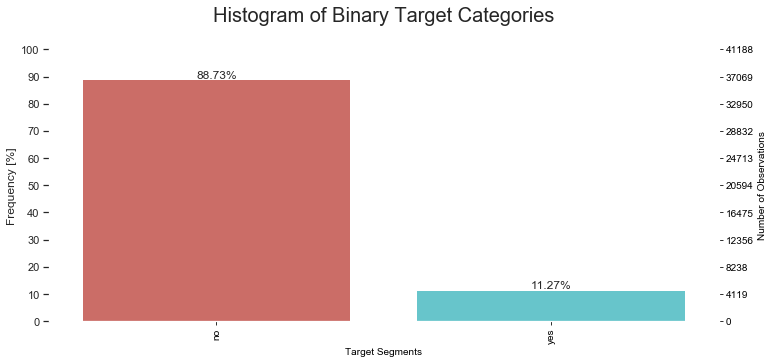

<a id="4"></a>
# Import Data and Python Packages

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
from sklearn import datasets, linear_model

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

unknown values are missing values. So we converted them to nan

In [ ]:
bank=pd.read_csv("/kaggle/input/bank-marketing/bank-additional-full.csv", error_bad_lines=False, sep=";", na_values='unknown')
df=bank.copy()
df.T

In [ ]:
featuresInformations=pd.read_csv("/kaggle/input/columns-information/columnInformations.csv")
featuresInformations.drop(featuresInformations.index)
featuresInformations

<a id="5"></a>
# Distribution of Target

In [ ]:
def histogram(df,feature, xlabel='Target Segments', ylabel='Number of Observations',
              title='Histogram of Binary Target Categories'):
    import matplotlib.ticker as ticker
    ncount = len(df)
    ax = sns.countplot(x = feature, data=df ,palette="hls")
    sns.set(font_scale=1)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    fig = plt.gcf()
    fig.set_size_inches(12,5)
    
    # Make twin axis
    ax2=ax.twinx()
    
    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    
    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), ha='center', va='bottom') 
        # set the alignment of the text
        
    # Use a LinearLocator to ensure the correct number of ticks
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))
    
    # Fix the frequency range to 0-100
    ax2.set_ylim(0,100)
    ax.set_ylim(0,ncount)
    
    # And use a MultipleLocator to ensure a tick spacing of 10
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
    
    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)
    plt.title(title, fontsize=20, y=1.08)
    plt.show();
    del ncount, x, y

In [ ]:
histogram(df,"y")

<a id="6"></a>
# Data Analysis

Changed the columns' names to use for loops effective

In [ ]:
df.columns=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 
            'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 
            'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']

Transforming some strings to 0 and 1

In [ ]:
df["housing"]=df["housing"].replace("yes", 1)
df["housing"]=df["housing"].replace("no", 0)

df["loan"]=df["loan"].replace("yes", 1)
df["loan"]=df["loan"].replace("no", 0)   

df["y"]=df["y"].replace("yes",1)
df["y"]=df["y"].replace("no",0)

Data type convertion

In [ ]:
df["job"]=df["job"].astype("category")
df["marital"]=df["marital"].astype("category")
df["default"]=df["default"].astype("category")
df["housing"]=df["housing"].astype("category")
df["loan"]=df["loan"].astype("category")
df["contact"]=df["contact"].astype("category")
df["month"]=df["month"].astype("category")
df["day_of_week"]=df["day_of_week"].astype("category")

Convert object to categorical variable

In [ ]:
from pandas.api.types import CategoricalDtype
educationOrder=CategoricalDtype(categories=["illiterate","basic.4y","basic.6y","basic.9y","high.school",
                                            "university.degree","professional.course"],ordered=True)
df["education"]=df["education"].astype(educationOrder)
poutcomeOrder=CategoricalDtype(categories=["nonexistent","failure","success"],ordered=True)
df["poutcome"]=df["poutcome"].astype(poutcomeOrder)

<a id="7"></a>
## Preparing numerical and categorical columns

In [ ]:
numerical_columns=["age", "duration", "campaign", "pdays", "previous", "emp_var_rate", 
                   "cons_price_idx", "cons_conf_idx", "nr_employed"]

categoricalColumns=['job', 'marital', 'education', 'default', 'housing', 'loan', 
                    'contact', 'month', 'day_of_week', 'poutcome', 'euribor3m',]

<a id="8"></a>
## Which numerical columns has 0 variance

In [ ]:
def ZeroVarianceFinder(df, numerical_columns):
    zerovariance_numerical_features=[]
    for col in numerical_columns:
        try:
            if pd.DataFrame(df[col]).describe().loc['std'][0] == 0.00 or \
            np.isnan(pd.DataFrame(df[col]).describe().loc['std'][0]):
                zerovariance_numerical_features.append(col)
        except:
            print("Error:", col)
    return zerovariance_numerical_features
len(ZeroVarianceFinder(df, numerical_columns))

<a id="9"></a>
## Which categorical columns has 0 variance

In [ ]:
singleton_categorics = []
for col in categoricalColumns :
    if len(df[col].unique()) <=1:
        singleton_categorics.append(col)
len(singleton_categorics)

Converting floats of number of employers to int bcs of meaningless

In [ ]:
df['nr_employed']=[int(x) for x in df['nr_employed']]

In [ ]:
histogram(df,"pdays",xlabel="Name of Data", title="Distribution of pdays before feature importance")

95% of this line has a value of 999. The remainder has different values. So let's convert them to binary values 999 ->1 others ->0

In [ ]:
df.loc[(df.pdays==999),"pdays"]=1 # Main DF changed
df.loc[(df.pdays!=1),"pdays"]=0 # Main DF changed

In [ ]:
histogram(df,"pdays",xlabel="Name of Data", title="Distribution of pdays after feature importance")

<a id="10"></a>
## Visualization for Numerical Features

In [ ]:
df.hist(column=numerical_columns, figsize=(30,30))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

<a id="11"></a>
## Buff Method

In [ ]:
def dataframeInformations(df):
    totalEntryList=[]
    totalMissingValueList=[]
    missingValRateList=[]
    dataTypeList=[]
    uniqueValuesList=[]
    totalUniqueValList=[]
    variableNameList=[]

    for element in df.columns:
        missingValRate=round((df[element].isna().sum()/len(df[element]))*100,2) #to show correct decimal and float part of number.
        totalEntryList.append(len(df[element]))
        totalMissingValueList.append(df[element].isna().sum())
        missingValRateList.append(missingValRate)
        dataTypeList.append(df[element].dtype)
        uniqueValuesList.append(list(df[element].unique()))
        totalUniqueValList.append(len(df[element].unique()))
        variableNameList.append(element)
    #create a dataframe to show all informations together
    dataInfoDf=pd.DataFrame({'Variable':variableNameList,'#_Total_Entry':totalEntryList,\
                             '#_Missing_Value':totalMissingValueList,'%_Missing_Value':missingValRateList,\
                             'Data_Type':dataTypeList,'Unique_Values':uniqueValuesList,\
                             '#_Uniques_Values':totalUniqueValList})
    return dataInfoDf.sort_values(by="Variable")

Creating index for data information DataFrame

In [ ]:
dataInfo=dataframeInformations(df)
variableList=[element for element in dataInfo['Variable'] ]
dataInfo=dataInfo.set_index('Variable')

Add columns explanation and columns type to dataInfo

In [ ]:
variableDefinition=list(featuresInformations['Variable_Definition'])
variableStructure=(featuresInformations['Variable_Structure'])
variableStructure=[x.lower() for x in variableStructure] #uppercase not working well in dataFrame therefore we converted all elements to lowercase
dataInfo['Variable_Definition']=variableDefinition
dataInfo['Variable_Structure']=variableStructure

Finding which missing imputation method we should use

In [ ]:
def findMethod(df,variableList):
    df['Imputation_Technique']=""
    for element in variableList:
        missingRate=float(dataInfo['%_Missing_Value'][element])
        if missingRate == 0:
            df['Imputation_Technique'][element]='No Missing Value'
        elif missingRate <= 5:
            df['Imputation_Technique'][element]='Simple'
        elif missingRate < 25:
            df['Imputation_Technique'][element]='Tree-based'
        elif missingRate < 50 :
            df['Imputation_Technique'][element]='Model'

findMethod(dataInfo,variableList)
dataInfo

<a id="12"></a>
# Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop("y", axis=1)
y=df.y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape , X_test.shape , y_train.shape, y_test.shape

<a id="13"></a>
## After train test split, checking for distibution of target

In [ ]:
histogram(X_train,y_train, title="Histogram of Binary Target Categories for X_train")

In [ ]:
histogram(X_test,y_test, title="Histogram of Binary Target Categories for X_test")

<a id="14"></a>
# Feature Engineering

<a id="15"></a>
## Outlier Detection

In [ ]:
sparse_columns=[]
for col in numerical_columns:
    if (X_train[col].mode()[0]==X_train[col].quantile(0.99)==X_train[col].quantile(0.75)):
        sparse_columns.append(col)
sparse_columns

In [ ]:
left_skewed_columns = []
for col in numerical_columns:
    if X_train.loc[X_train[col]!=X_train[col].mode()[0],col].median() < -1:
        left_skewed_columns.append(col)
left_skewed_columns

<a id="16"></a>
### Visualization before outlier detection

In [ ]:
from pylab import rcParams
def box_plot(X_train, y_train, column):
    rcParams['figure.figsize'] = 20, 10
    fig, axs = plt.subplots(3,3)
    plt.tight_layout()
    fig.subplots_adjust(top=0.7)
    sns.set(style="ticks", palette="rainbow")
    j = 0
    k = 0
    for i in range(len(column)):
        sns.boxplot(x=y_train, y=column[i], data=X_train, ax=axs[j,k])
        if(k==2):
            k = 0
            j += 1
        else:
            k += 1
    plt.tight_layout()
    plt.show()

box_plot(X_train, y_train,numerical_columns)

<a id="17"></a>
### Finding and fixing outliers

In [ ]:
def HardEdgeReduction(df,numerical_columns,sparse_columns,upper_quantile=0.99,lower_quantile=0.01):
    
    import pandas as pd

    import psutil, os, gc, time
    print("HardEdgeReduction process has began :\n")
    proc = psutil.Process(os.getpid())
    gc.collect()
    mem_0 = proc.memory_info().rss
    start_time = time.time()
    
    # Do outlier cleaning in only one loop
    epsilon = 0.0001 # for zero divisions

   
    data_outlier_cleaned = df.copy()

    print("Detected outliers will be replaced with edged quantiles/percentiles: %1 and %99 !\n")
    print("Total number of rows : %s\n"%data_outlier_cleaned.shape[0])

    outlier_boundries_dict={}

    for col in numerical_columns:

        if col in sparse_columns:

            # Find nansparse columns
            nonsparse_data = pd.DataFrame(data_outlier_cleaned[data_outlier_cleaned[col] !=\
                                                             data_outlier_cleaned[col].mode()[0]][col]) 
            # we used mode to detect sparse columns bcs it is efficient

            # Find the bounds for outliers
            # Lower bound
            if nonsparse_data[col].quantile(lower_quantile) < data_outlier_cleaned[col].mode()[0]: 
                lower_bound_sparse = nonsparse_data[col].quantile(lower_quantile)
            else:
                lower_bound_sparse = data_outlier_cleaned[col].mode()[0]
            
            # Upper bound
            if nonsparse_data[col].quantile(upper_quantile) < data_outlier_cleaned[col].mode()[0]: 
                upper_bound_sparse = data_outlier_cleaned[col].mode()[0]
            else:
                upper_bound_sparse = nonsparse_data[col].quantile(upper_quantile)

            outlier_boundries_dict[col]=(lower_bound_sparse,upper_bound_sparse)

            # Information about outlier values' number
            number_of_outliers = len(data_outlier_cleaned[(data_outlier_cleaned[col] < lower_bound_sparse) |\
                                                        (data_outlier_cleaned[col] > upper_bound_sparse)][col])
            print("Sparse: Outlier number in %s is equal to : "%col,number_of_outliers/(nonsparse_data.shape[0] -
                                                                                       nonsparse_data.isnull().sum()))

            # Making equal to outliers to the bounds
            if number_of_outliers > 0:

                data_outlier_cleaned.loc[data_outlier_cleaned[col] < lower_bound_sparse,col] = lower_bound_sparse - epsilon # VERİMİZ DEĞİŞTİ !
                data_outlier_cleaned.loc[data_outlier_cleaned[col] > upper_bound_sparse,col] = upper_bound_sparse + epsilon # VERİMİZ DEĞİŞTİ !

        else:
            number_of_outliers = len(data_outlier_cleaned[(data_outlier_cleaned[col] < \
                                                         data_outlier_cleaned[col].quantile(lower_quantile))|\
                                                        (data_outlier_cleaned[col] > \
                                                         data_outlier_cleaned[col].quantile(upper_quantile))] [col])
            result = number_of_outliers/(df[col].shape[0] - df[col].isnull().sum())
            print("Other: Outlier number in {} is equal to : ".format(col),round(result,4)) 

            # 'Standart' aykırı değerler değiştiriliyor : Changing standard outliers
            if number_of_outliers > 0:
                
                lower_bound_sparse = data_outlier_cleaned[col].quantile(lower_quantile)
                data_outlier_cleaned.loc[data_outlier_cleaned[col] < lower_bound_sparse,col] = lower_bound_sparse  - epsilon

                upper_bound_sparse = data_outlier_cleaned[col].quantile(upper_quantile)
                data_outlier_cleaned.loc[data_outlier_cleaned[col] > upper_bound_sparse,col]= upper_bound_sparse  + epsilon

            outlier_boundries_dict[col]=(lower_bound_sparse,upper_bound_sparse)


    print("HardEdgeReduction has been completed in %s minutes !" % ((time.time() - start_time)/60))
    return data_outlier_cleaned, outlier_boundries_dict

In [ ]:
X_train, outlier_boundries_dict_for_train = HardEdgeReduction(X_train,numerical_columns,sparse_columns)
X_test, outlier_boundries_dict_for_test = HardEdgeReduction(X_test,numerical_columns,sparse_columns)

<a id="18"></a>
### Visualization After Cleaning Outlier

In [ ]:
box_plot(X_train, y_train,numerical_columns)

<a id="19"></a>
## Missing Value Imputation

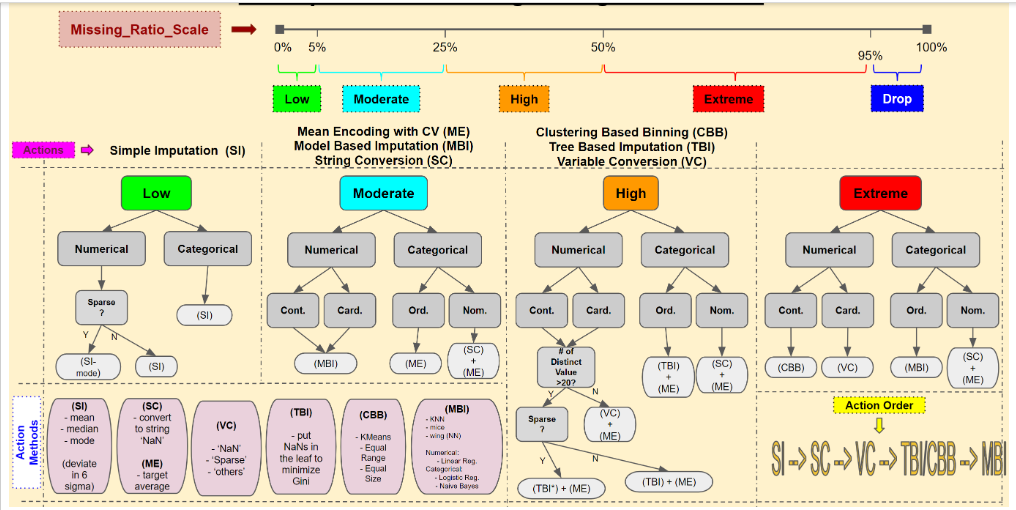

In [ ]:
#!pip install missingno
import missingno as msno
msno.matrix(X_train);

In [ ]:
msno.bar(X_train);

<a id="20"></a>
### According to photo, improved different imputation models for our model.

In [ ]:
#if missing rate between 0-5 and categorical data use this method
def missingvalImputeMF(df,column):
    valueList=list(df[column])
    mostFrequentVal=max(set(valueList), key = valueList.count)
    df[column]=df[column].fillna(mostFrequentVal) 

In [ ]:
def missingImpute(df):
    for col in df.columns:
        infoStr=""
        missingRatioRate=round((df[col].isna().sum()/len(df[col]))*100,2)
        if missingRatioRate==0:
            infoStr+="{} - There is no missing value".format(col)
            if str(df[col].dtype)=="category":
                infoStr+=" - Category"
                print(infoStr)
            else:
                infoStr+=" - Numerical"
                print(infoStr)
            print("--------------------------")
        elif missingRatioRate<=5:
            infoStr+=" {} - Ratio:{}% 0-5".format(col,missingRatioRate)
            if str(df[col].dtype)=="category":
                #if column's missing rate between 0% - 5% and categorical variable
                missingvalImputeMF(df,col)
                missingRatioRate=round((df[col].isna().sum()/len(df[col]))*100,2)
                infoStr+="{} -  There is no missing value".format(col)
                infoStr+=" - Category"
                print("DONE {} ".format(infoStr))
                
            else:
                infoStr+=" - Numerical"
            print(infoStr)
            print("--------------------------")
        elif missingRatioRate<=25:
            infoStr+="{} - Ratio:{}% 5-25".format(col,missingRatioRate)
            if str(df[col].dtype)=="category":
                infoStr+=" - Category"
                print(infoStr)
            else:
                infoStr+=" - Numerical"
                print(infoStr)
                print("--------------------------")
        elif missingRatioRate<=50:
            infoStr+="{} - Ratio:{}% 25-50".format(col,missingRatioRate)
            if str(df[col].dtype)=="category":
                infoStr+=" - Category"
                print(infoStr)
            else:
                infoStr+=" - Numerical"
                print(infoStr)
            print("--------------------------")
        elif missingRatioRate<=95:
            infoStr+="{} - Ratio:{}% 50-95".format(col,missingRatioRate)
            if str(df[col].dtype)=="category":
                infoStr+=" - Category"
                print(infoStr)
            else:
                infoStr+=" - Numerical"
                print(infoStr)
            print("--------------------------")
        else:
            infoStr+="{} - Ratio:{}% 95-100".format(col,missingRatioRate)
            if str(df[col].dtype)=="category":
                infoStr+=" - Category"
                print(infoStr)
            else:
                infoStr+=" - Numerical"
                print(infoStr)
            print("--------------------------")

In [ ]:
missingImpute(X_train)

In [ ]:
missingImpute(X_test)

<a id="21"></a>
## String Conversion

In [ ]:
X_train['default'] = X_train['default'].cat.add_categories('unknown')
X_train['default'].fillna('unknown', inplace =True) 

X_test['default'] = X_test['default'].cat.add_categories('unknown')
X_test['default'].fillna('unknown', inplace =True) 

<a id="22"></a>
## Feature Enconding

In [ ]:
def binaryEncoding(df,column):
    from category_encoders import BinaryEncoder
    encoder=BinaryEncoder(cols=[column])
    df=encoder.fit_transform(df)
    return df

def oneHotEncoding(df,column):
    from category_encoders import OneHotEncoder
    encoder=OneHotEncoder(cols=[column])
    df = encoder.fit_transform(df)
    return df

def encodingForCategoricalFeature(df,categoricalColumns):
    for element in categoricalColumns:
        if len(df[element].unique())<=5:
            df=oneHotEncoding(df,element)
        else:
            df=binaryEncoding(df,element)
    return df

X_train=encodingForCategoricalFeature(X_train,categoricalColumns)
X_test=encodingForCategoricalFeature(X_test,categoricalColumns)

<a id="23"></a>
## Normalization

In [ ]:
from sklearn import preprocessing
X_train.loc[:,numerical_columns]=preprocessing.normalize(X_train.loc[:,numerical_columns])
X_test.loc[:,numerical_columns]=preprocessing.normalize(X_test.loc[:,numerical_columns])

<a id="24"></a>
## Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=True)
feat_importances.plot(kind='barh',figsize=(20,20))
plt.show();

Dropped following features bcs there is no relation

In [ ]:
X_train.drop(labels=["euribor3m_0", "month_0", "default_2", "education_0", "job_0"],axis=1,inplace=True)
X_test.drop(labels=["euribor3m_0", "month_0", "default_2", "education_0", "job_0"],axis=1,inplace=True)

<a id="25"></a>
## Correlation Matrix Between Features

In [ ]:
plt.subplots(figsize=(20,20))
sns.heatmap(X_train.corr())
plt.show();

<a id="26"></a>
# MODELLING

In [ ]:
def models(X_train,Y_train):
    
    #use logistic regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    
    #use KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
    knn.fit(X_train,Y_train)
    
    #use SVC (linear kernel)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel="linear",random_state=0,probability=True)
    svc_lin.fit(X_train,Y_train)
    
    #use SVC (RBF kernel)
    svc_rbf=SVC(kernel="rbf",random_state=0,probability=True)
    svc_rbf.fit(X_train,Y_train)
    
    #use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(X_train,Y_train)
    
    #use Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion="entropy",random_state=0)
    tree.fit(X_train,Y_train)
    
    #use Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
    forest.fit(X_train,Y_train)
    
    # use Hist Gradient Boosting Classifier
    from sklearn.experimental import enable_hist_gradient_boosting
    from sklearn.ensemble import HistGradientBoostingClassifier
    histgrad=HistGradientBoostingClassifier()
    histgrad.fit(X_train,y_train)
    
    # use GBM
    from sklearn.ensemble import GradientBoostingClassifier
    gbm=GradientBoostingClassifier()
    gbm.fit(X_train,y_train)
    
    # use XGBoost
    #!pip install xgboost
    from xgboost import XGBClassifier
    xgboost=XGBClassifier()
    xgboost.fit(X_train,y_train)
    
    # use LightGBM
    #!conda install -c conda-forge lightgbm
    from lightgbm import LGBMClassifier
    lightgbm=LGBMClassifier()
    lightgbm.fit(X_train,y_train)

    #print the training scores for each model
    print('[0] Logistic Regression Training Score:',log.score(X_train,Y_train))
    print('\n[1] K Neighbors Training Score:',knn.score(X_train,Y_train))
    print('\n[2] SVC Linear Training Score:',svc_lin.score(X_train,Y_train))
    print('\n[3] SVC RBF Training Score:',svc_rbf.score(X_train,Y_train))
    print('\n[4] Gaussian Training Score:',gauss.score(X_train,Y_train))
    print('\n[5] Decision Tree Training Score:',tree.score(X_train,Y_train))
    print('\n[6] Random Forest Training Score:',forest.score(X_train,Y_train))
    print('\n[7] Hist Gradient Boosting Training Score:',histgrad.score(X_train,Y_train))
    print('\n[8] Gradient Boosting Training Score:',gbm.score(X_train,Y_train))
    print('\n[9] XGBoost Training Score:',xgboost.score(X_train,Y_train))
    print('\n[10] Light GBM Training Score:',lightgbm.score(X_train,Y_train))
    
    return log,knn,svc_lin,svc_rbf,gauss,tree,forest,histgrad,gbm,xgboost,lightgbm

In [ ]:
log,knn,svc_lin,svc_rbf,gauss,tree,forest,histgrad,gbm,xgboost,lightgbm=models(X_train,y_train)

<a id="27"></a>
## Roc and Accuracy Score Before Tune

In [ ]:
models=[log,knn,svc_lin,svc_rbf,gauss,tree,forest,histgrad,gbm,xgboost,lightgbm]
models_name=["log","knn","svc_lin","svc_rbf","gauss","tree","forest","histgrad","gbm","xgboost","lightgbm"]

In [ ]:
before_tune_accuracy_score={}
def accuracy_score_calculator(model,model_name):
    from sklearn.metrics import accuracy_score
    y_pred=model.predict(X_test)
    before_tune_accuracy_score[model_name]=accuracy_score(y_test,y_pred)

In [ ]:
before_tune_roc_score={}
def roc_score_calculator(model,model_name):
    from sklearn.metrics import roc_auc_score
    y_pred=model.predict_proba(X_test)[:,1]
    before_tune_roc_score[model_name]=roc_auc_score(y_test,y_pred)

In [ ]:
for i in range(len(models)):
    roc_score_calculator(models[i],models_name[i])
    accuracy_score_calculator(models[i],models_name[i])

In [ ]:
size=np.arange(len(models))
plt.ylabel="Percentage"
plt.bar(size-0.2, before_tune_roc_score.values(), color='g', width=0.4,tick_label=models_name)
plt.bar(size+0.2, before_tune_accuracy_score.values(),color='b', width=0.4,tick_label=models_name)
plt.legend(["Before Roc Score", "Before Accuracy Score"]);

ROC CURVE VISUALIZATION

In [ ]:
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(10,10))
ax = plt.gca()
log_disp = plot_roc_curve(log, X_test, y_test, ax=ax, alpha=0.8)
knn_disp = plot_roc_curve(knn, X_test, y_test, ax=ax, alpha=0.8)
svc_lin_disp = plot_roc_curve(svc_lin, X_test, y_test, ax=ax, alpha=0.8)
svc_rbf_disp = plot_roc_curve(svc_rbf, X_test, y_test, ax=ax, alpha=0.8)
gauss_disp = plot_roc_curve(gauss, X_test, y_test, ax=ax, alpha=0.8)
tree_disp = plot_roc_curve(tree, X_test, y_test, ax=ax, alpha=0.8)
forest_disp = plot_roc_curve(forest, X_test, y_test, ax=ax, alpha=0.8)
histgrad_disp = plot_roc_curve(histgrad, X_test, y_test, ax=ax, alpha=0.8)
gbm_disp = plot_roc_curve(gbm, X_test, y_test, ax=ax, alpha=0.8)
xgboost_disp = plot_roc_curve(xgboost, X_test, y_test, ax=ax, alpha=0.8)
lightgbm_disp = plot_roc_curve(lightgbm, X_test, y_test, ax=ax, alpha=0.8)
plt.legend(loc = 'lower right', prop={'size': 16})
plt.show()

<a id="28"></a>
## Model Tuning

We see last 4 models gave better score, so let's try to find their best params and tune them 

<a id="29"></a>
### Light GBM Classifier

In [ ]:
"""
from sklearn.model_selection import GridSearchCV
lgbm_params={'n_estimators':[100, 500, 1000, 2000],
            'subsample':[0.6,0.8, 1.0], 'max_depth':[3,4,5,6],
            'learning_rate':[0.1, 0.01,0.02, 0.05], 'min_child_samples':[5,10,20]}
            
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()
lgbm_cv_model=GridSearchCV(lgbm,lgbm_params,cv=10,n_jobs=-1,verbose=2)
lgbm_cv_model.fit(X_train,y_train)
lgbm_cv_model.best_params_
"""

In [ ]:
after_tune_roc_scores={}
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(learning_rate= 0.1 , max_depth= 6, subsample= 0.6, n_estimators= 100, min_child_samples= 10)
lgbm_tuned=lgbm.fit(X_train,y_train)
y_pred=lgbm_tuned.predict_proba(X_test)[:,1]
after_tune_roc_scores["Light GBM Classifier"]=roc_auc_score(y_test,y_pred)
roc_auc_score(y_test,y_pred)

<a id="30"></a>
### XGBoost Classifier

In [ ]:
"""
from sklearn.model_selection import GridSearchCV
xgb_params={'n_estimators':[100, 500, 1000, 2000],
            'subsample':[0.6,0.8, 1.0], 'max_depth':[3,4,5,6],
            'learning_rate':[0.1, 0.01,0.02, 0.05], 'min_samples_split':[2,5,10]}
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb_cv_model=GridSearchCV(xgb,xgb_params,cv=10,n_jobs=-1,verbose=2)
xgb_cv_model.fit(X_train,y_train)
xgb_cv_model.best_params_
"""

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb_tuned=xgb.fit(X_train,y_train)
y_pred=xgb_tuned.predict_proba(X_test)[:,1]
after_tune_roc_scores["XGBoost Classifier"]=roc_auc_score(y_test,y_pred)
roc_auc_score(y_test,y_pred)

<a id="31"></a>
### Histogram-based Gradient Boosting Classification Tree

In [ ]:
"""
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
histgrad_params={'max_depth':[4,6,8], 'max_leaf_nodes':np.arange(0,20), 'learning_rate':[0.1, 0.01]}
histgrad=HistGradientBoostingClassifier()
histgrad_cv_model=GridSearchCV(histgrad,histgrad_params,cv=10,n_jobs=-1)
histgrad_cv_model.fit(X_train,y_train)
histgrad_cv_model.best_params_
"""

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

histgrad=HistGradientBoostingClassifier(max_depth=8,max_leaf_nodes=15,learning_rate=0.1)
histgrad_tuned=xgb.fit(X_train,y_train)
y_pred=histgrad_tuned.predict_proba(X_test)[:,1]
after_tune_roc_scores["Histogram Gradient Boosting"]=roc_auc_score(y_test,y_pred)
roc_auc_score(y_test,y_pred)

<a id="32"></a>
### Gradient Boosting Classifier

In [ ]:
"""
gbm_params={'learning_rate':[0.001, 0.01,0.1, 0.05], 'n_estimators':[100, 500, 1000],
             'max_depth':[3, 5, 10], 'min_samples_split':[2,5,10]}
             
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()
gbm_cv_model=GridSearchCV(gbm,gbm_params,cv=10,n_jobs=-1,verbose=2)
gbm_cv_model.fit(X_train,y_train)
gbm_cv_model.best_params_
"""

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()
gbm_tuned=gbm.fit(X_train,y_train)
y_pred=gbm_tuned.predict_proba(X_test)[:,1]
after_tune_roc_scores["Gradient Boosting Classifier"]=roc_auc_score(y_test,y_pred)
roc_auc_score(y_test,y_pred)

All 4 models in one graph

In [ ]:
roc_curve_values_df=pd.DataFrame.from_dict(after_tune_roc_scores, orient='index',columns=["After Tune Roc Score"])
roc_curve_values_df = roc_curve_values_df.sort_values(by=['After Tune Roc Score'])
roc_curve_values_df.plot(kind='barh', y='After Tune Roc Score', color="orange", figsize=(10,6), title="After Tune Model's Roc Scores");

In [ ]:
roc_curve_values_df.index=["gbm", "xgboost", "histgrad", "lightgbm" ]
before_tune_roc_score_df=pd.DataFrame.from_dict(before_tune_roc_score,orient='index', columns=["Before Tune Roc Score"])
before_tune_roc_score_df

<a id="33"></a>
## Roc and Accuracy Score After Tune

In [ ]:
final_scores=pd.concat([roc_curve_values_df, before_tune_roc_score_df], axis=1)
final_scores.dropna(inplace=True)
final_scores

In [ ]:
size=np.arange(len(final_scores))
plt.ylabel="Percentage"
plt.bar(size-0.2, list(final_scores["After Tune Roc Score"].values), color='orange', width=0.4, 
        tick_label=final_scores["After Tune Roc Score"].index)
plt.bar(size+0.2, list(final_scores["Before Tune Roc Score"].values), color='black', width=0.4)
plt.legend(["After Tune Roc Score", "Before  Tune Roc Score"]);

# Conclusion: 
## Here, if we use Light GBM Model, we will get the best result. So for us, Light GBM is perfect match for our dataset.